In [1]:
from mnist_deep_nf import *

/apps/conda/joao.pires/.envs/jpt_main/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[rank: 0] Seed set to 42


In [2]:
## test_set, train_dataset

In [3]:
import pickle 
with open('test_dic.pkl', 'rb') as fp:
    test_dic = pickle.load(fp)

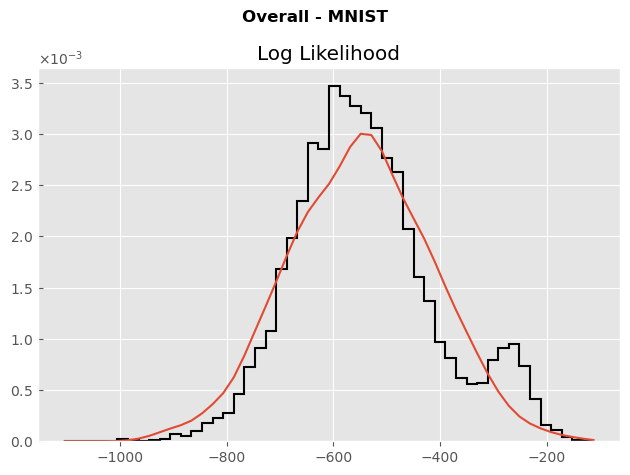

In [26]:
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, ScalarFormatter) 

fig, ax = plt.subplots(ncols = 1)
plt.style.use('ggplot')
idx1 = 0

methods = [lls, bpds]
name = ['Log Likelihood', 'BPD']

for i in range(1):

    distribution = methods[i]

    n, x, _ = ax.hist(distribution, histtype=u'step', bins = 50, density = True, color = 'k', lw = 1.5);
    noise = np.random.normal(np.median(distribution), np.std(distribution), (2000, ))
    density = stats.gaussian_kde(noise)
    ax.plot(x, density(x))

    ax.set_title(idx1, weight = 'bold');
    idx1+=1
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax.tick_params(axis = 'y', which = 'both', direction = 'in')
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-1, 1))  # Adjust the power limits as needed
    ax.yaxis.set_major_formatter(formatter)
    ax.set_title(name[i])

plt.subplots_adjust(wspace = 0.25, hspace = 0.35)
fig.suptitle('Overall - MNIST', weight = 'bold')
plt.tight_layout()
plt.savefig('images/overall_mnist.png', format = 'png')



In [27]:
how_many_lls = (lls < np.mean(lls) - 2*np.std(lls)).sum()
how_many_lls

142

In [15]:
how_many_bpds = (bpds < np.mean(bpds) - 2.2*np.std(bpds)).sum()
how_many_bpds

270

In [8]:
def show_imgs_save(imgs, title=None, row_size=8, fig_name = None):
    # Form a grid of pictures (we use max. 8 columns)
    num_imgs = imgs.shape[0] if isinstance(imgs, torch.Tensor) else len(imgs)
    is_int = imgs.dtype==torch.int32 if isinstance(imgs, torch.Tensor) else imgs[0].dtype==torch.int32
    nrow = min(num_imgs, row_size)
    ncol = int(math.ceil(num_imgs/nrow))
    imgs = torchvision.utils.make_grid(imgs, nrow=nrow, pad_value=128 if is_int else 0.5)
    np_imgs = imgs.cpu().numpy()
    # Plot the grid
    plt.figure(figsize=(1.5*nrow, 1.5*ncol))
    plt.imshow(np.transpose(np_imgs, (1,2,0)), interpolation='nearest')
    plt.axis('off')
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    if fig_name:
        plt.savefig(fig_name + '.png', format = 'png')
    plt.show()
    plt.close()

In [9]:
lls_sorted = np.argsort(lls)
bpds_sorted = np.argsort(bpds)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


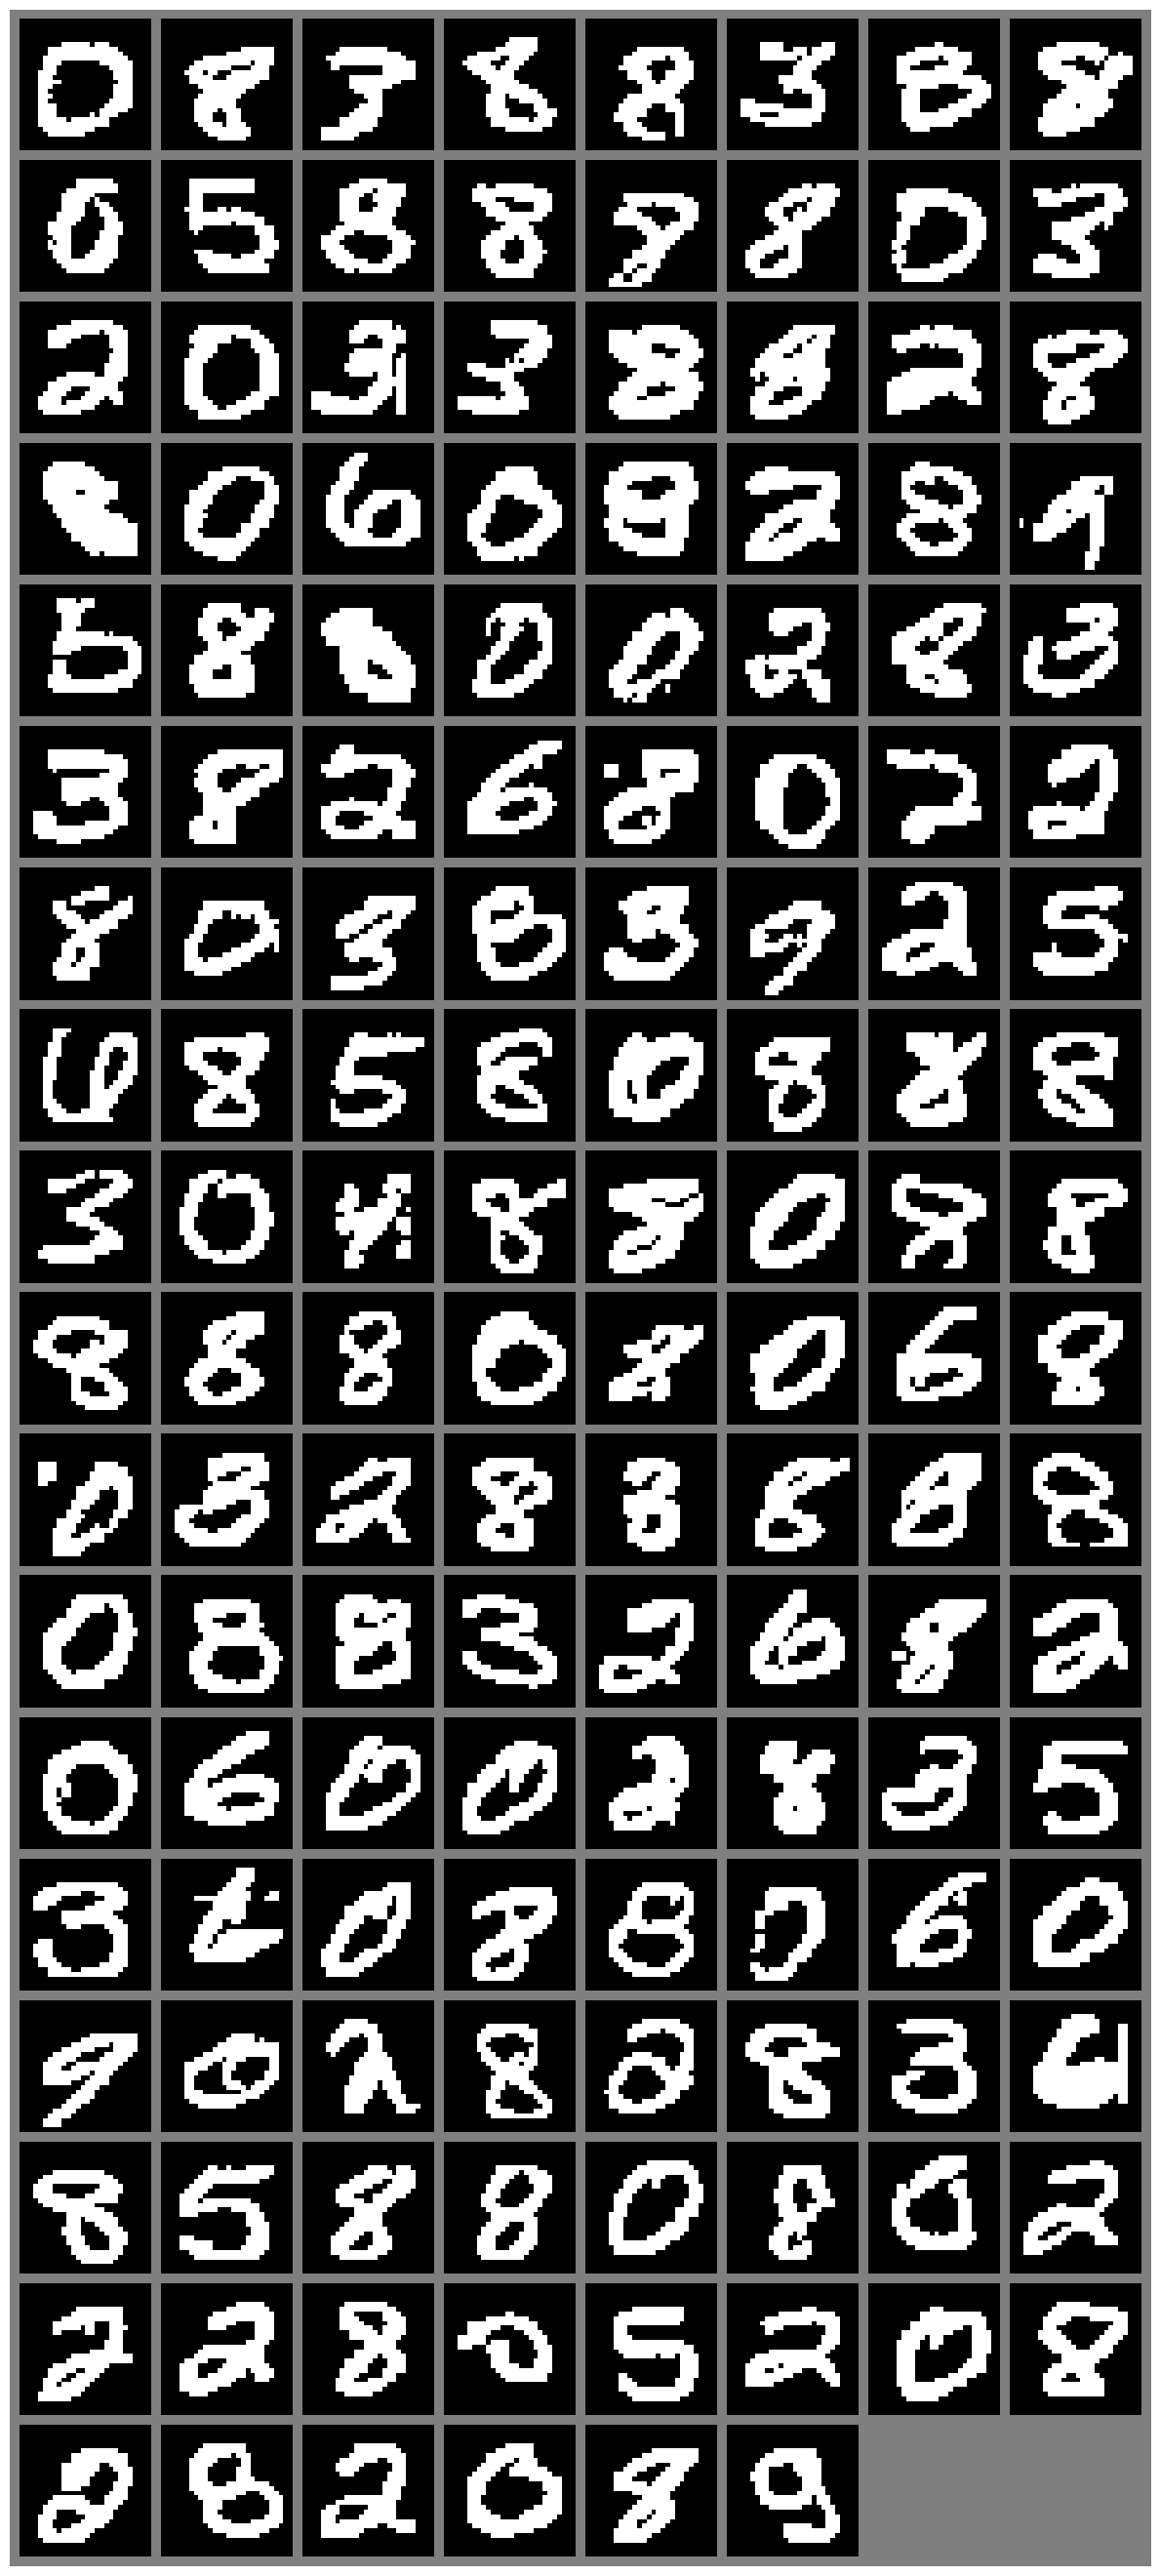

In [13]:
top_anomalous = torch.zeros(size = (how_many_lls, 1, 28, 28))
pos = lls_sorted[:how_many_lls]

for j in range(how_many_lls):
    top_anomalous[j] = images[pos[j]]

show_imgs_save(top_anomalous, fig_name = 'images/overall_mnist_ll.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


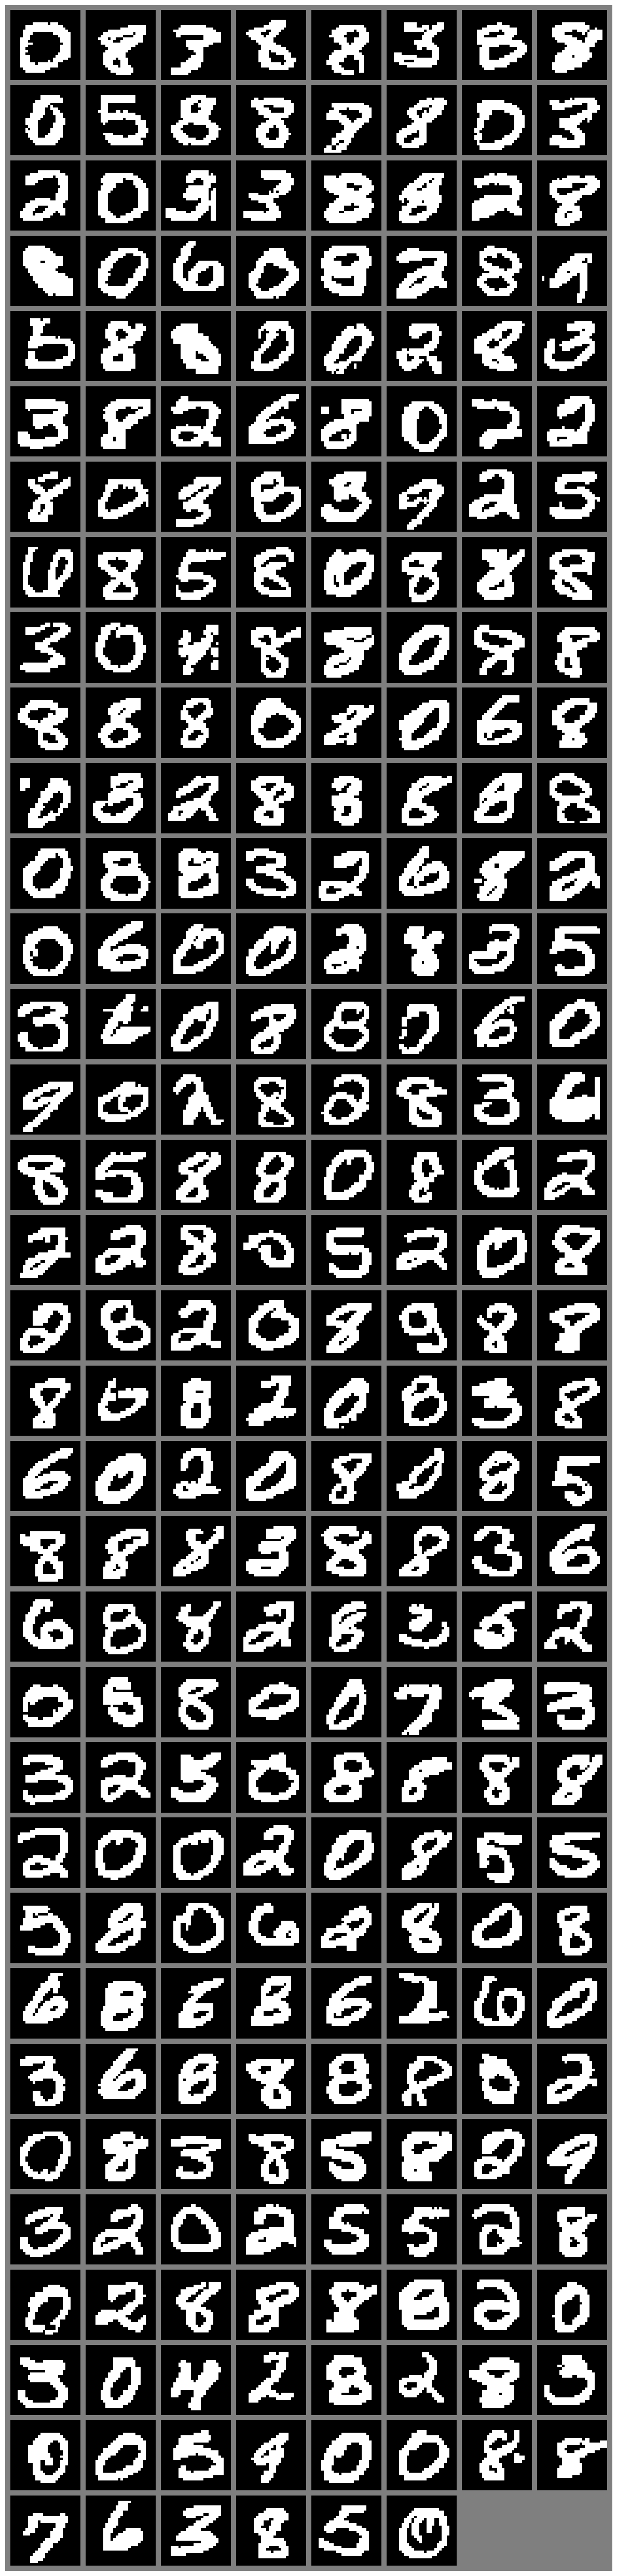

In [16]:
top_anomalous = torch.zeros(size = (how_many_bpds, 1, 28, 28))
pos = lls_sorted[:how_many_bpds]

for j in range(how_many_bpds):
    top_anomalous[j] = images[pos[j]]

show_imgs_save(top_anomalous, fig_name = 'images/overall_mnist_bpd.png')